In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helper import load_folder,seconds_to_hhmmss

In [68]:
df = load_folder('2013')

NameError: name 'Path' is not defined

In [ ]:
len(df)

5614888

In [ ]:
end=df[df["end station name"].isna()]

In [ ]:

# Assuming df is already loaded with the relevant data

# Calculate trip duration
df['trip_duration'] = (pd.to_datetime(df['stoptime']) - pd.to_datetime(df['starttime'])).dt.total_seconds()


# Identify oddities
oddities = df[(df['trip_duration'] <= 0) | 
              ((df['start station id'] == df['end station id']) & (df['trip_duration'] > 600)) |  # Same start and end station with duration > 10 minutes
              (df['trip_duration'] > 86400)] 

# Display oddities
oddities.trip_duration=oddities.trip_duration.apply(seconds_to_hhmmss)
oddities


/tmp/ipykernel_21753/2614801976.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oddities.trip_duration=oddities.trip_duration.apply(seconds_to_hhmmss)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Source,trip_duration
35,724,2013-10-01 00:07:59,2013-10-01 00:20:03,120,Lexington Ave & Classon Ave,40.686768,-73.959282,120.0,Lexington Ave & Classon Ave,40.686768,-73.959282,19598,Customer,\N,0,S0,00:12:04
47,974,2013-10-01 00:10:44,2013-10-01 00:26:58,438,St Marks Pl & 1 Ave,40.727791,-73.985649,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,17373,Subscriber,1986,1,S0,00:16:14
262,2069,2013-10-01 00:55:45,2013-10-01 01:30:14,480,W 53 St & 10 Ave,40.766697,-73.990617,480.0,W 53 St & 10 Ave,40.766697,-73.990617,15954,Subscriber,1968,1,S0,00:34:29
393,950,2013-10-01 01:48:36,2013-10-01 02:04:26,426,West St & Chambers St,40.717548,-74.013221,426.0,West St & Chambers St,40.717548,-74.013221,19450,Subscriber,1994,1,S0,00:15:50
458,1718,2013-10-01 02:33:38,2013-10-01 03:02:16,237,E 11 St & 2 Ave,40.730473,-73.986724,237.0,E 11 St & 2 Ave,40.730473,-73.986724,18635,Customer,\N,0,S0,00:28:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614613,959,2013-09-30 23:26:10,2013-09-30 23:42:09,504,1 Ave & E 15 St,40.732219,-73.981656,504.0,1 Ave & E 15 St,40.732219,-73.981656,19502,Subscriber,1986,1,S6,00:15:59
5614804,788,2013-09-30 23:46:38,2013-09-30 23:59:46,322,Clinton St & Tillary St,40.696192,-73.991218,322.0,Clinton St & Tillary St,40.696192,-73.991218,15033,Customer,\N,0,S6,00:13:08
5614805,786,2013-09-30 23:46:48,2013-09-30 23:59:54,322,Clinton St & Tillary St,40.696192,-73.991218,322.0,Clinton St & Tillary St,40.696192,-73.991218,14692,Customer,\N,0,S6,00:13:06
5614806,763,2013-09-30 23:47:08,2013-09-30 23:59:51,322,Clinton St & Tillary St,40.696192,-73.991218,322.0,Clinton St & Tillary St,40.696192,-73.991218,17027,Customer,\N,0,S6,00:12:43


In [ ]:
df[df.tripduration>86400]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Source,trip_duration
104589,113385,2013-10-03 16:19:09,2013-10-04 23:48:54,473,Rivington St & Chrystie St,40.721101,-73.991925,297.0,E 15 St & 3 Ave,40.734232,-73.986923,16662,Subscriber,1980,2,S0,113385.0
126639,302247,2013-10-04 08:05:17,2013-10-07 20:02:44,379,W 31 St & 7 Ave,40.749156,-73.991600,167.0,E 39 St & 3 Ave,40.748901,-73.976049,19866,Subscriber,1987,1,S0,302247.0
152334,1259480,2013-10-04 18:03:56,2013-10-19 07:55:21,527,E 33 St & 1 Ave,40.743156,-73.974347,267.0,Broadway & W 36 St,40.750977,-73.987654,19704,Customer,\N,0,S0,1259485.0
171085,110224,2013-10-05 12:05:20,2013-10-06 18:42:24,426,West St & Chambers St,40.717548,-74.013221,147.0,Greenwich St & Warren St,40.715422,-74.011220,15901,Customer,\N,0,S0,110224.0
185287,94000,2013-10-05 16:59:09,2013-10-06 19:05:49,358,Christopher St & Greenwich St,40.732916,-74.007114,409.0,DeKalb Ave & Skillman St,40.690649,-73.956431,17287,Customer,\N,0,S0,94000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530814,234565,2013-09-28 16:10:26,2013-10-01 09:19:51,384,Fulton St & Waverly Ave,40.683178,-73.965964,310.0,State St & Smith St,40.689269,-73.989129,16468,Subscriber,1981,1,S6,234565.0
5558108,99022,2013-09-29 13:51:33,2013-09-30 17:21:55,306,Cliff St & Fulton St,40.708235,-74.005301,373.0,Willoughby Ave & Walworth St,40.693317,-73.953820,15374,Subscriber,1987,2,S6,99022.0
5570857,90122,2013-09-29 18:17:45,2013-09-30 19:19:47,128,MacDougal St & Prince St,40.727103,-74.002971,383.0,Greenwich Ave & Charles St,40.735238,-74.000271,15420,Subscriber,1988,1,S6,90122.0
5578166,111026,2013-09-30 03:33:45,2013-10-01 10:24:11,493,W 45 St & 6 Ave,40.756800,-73.982912,373.0,Willoughby Ave & Walworth St,40.693317,-73.953820,19540,Customer,\N,0,S6,111026.0


/tmp/ipykernel_21753/1922626751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_trip["starttime"] = pd.to_datetime(round_trip["starttime"])


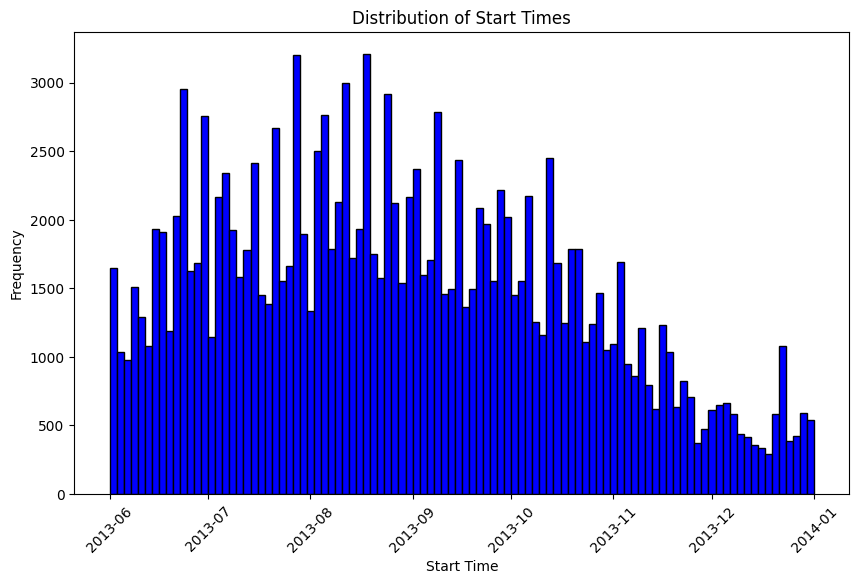

In [ ]:
round_trip=df[(df['start station id'] == df['end station id'])]
round_trip["starttime"] = pd.to_datetime(round_trip["starttime"])

plt.figure(figsize=(10, 6))
plt.hist(round_trip['starttime'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.title('Distribution of Start Times')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_21753/1606824793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_station["starttime"] = pd.to_datetime(end_station["starttime"])


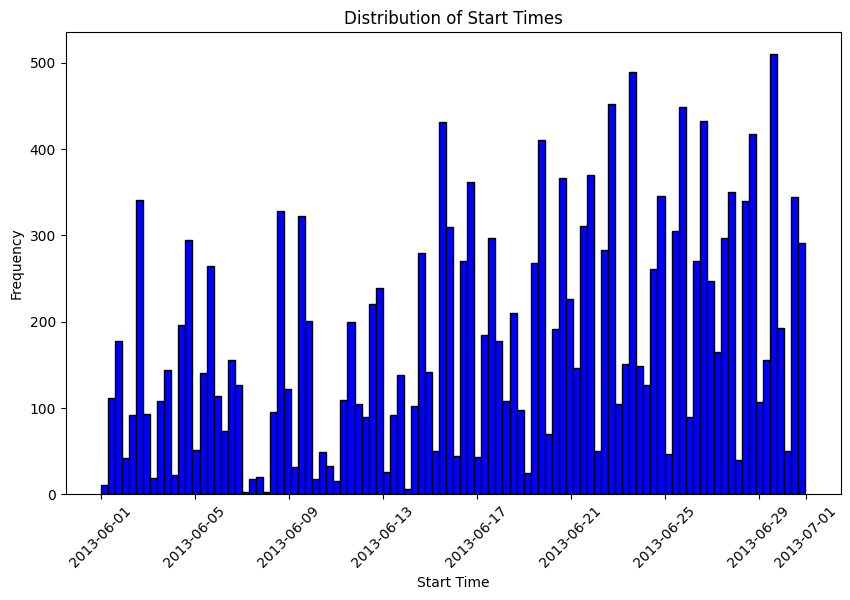

In [ ]:
end_station=df[df["end station name"].isna()== True]

end_station["starttime"] = pd.to_datetime(end_station["starttime"])

plt.figure(figsize=(10, 6))
plt.hist(end_station['starttime'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.title('Distribution of Start Times')
plt.xticks(rotation=45)
plt.show()